In [71]:
import pandas as pd

import numpy as np 
import statsmodels.api as sm   
import sklearn as sk 
import matplotlib.pyplot as plt
from scipy import stats

# Regresión Lineal Simple

In [81]:
df = pd.read_csv(
    'https://github.com/SysBioengLab/IIQ3402-Statistical-Design/blob/main/SetDeDatos/Fish.csv?raw=true',    
) # descargamos el dataset

## EDA 


> Realice un análisis exploratorio univariado y bivariado de las variables `Width` y `Height`. ¿Presentan alguna distribución particular? ¿Existen valores atípicos o sesgos?


Previo a cualquier análisis es importante saber con lo que se está trabajando. Para esto realizamos un EDA.

In [82]:
width = df['Width'] # extraemos la columna Width
height = df['Height'] # extraemos la columna Height

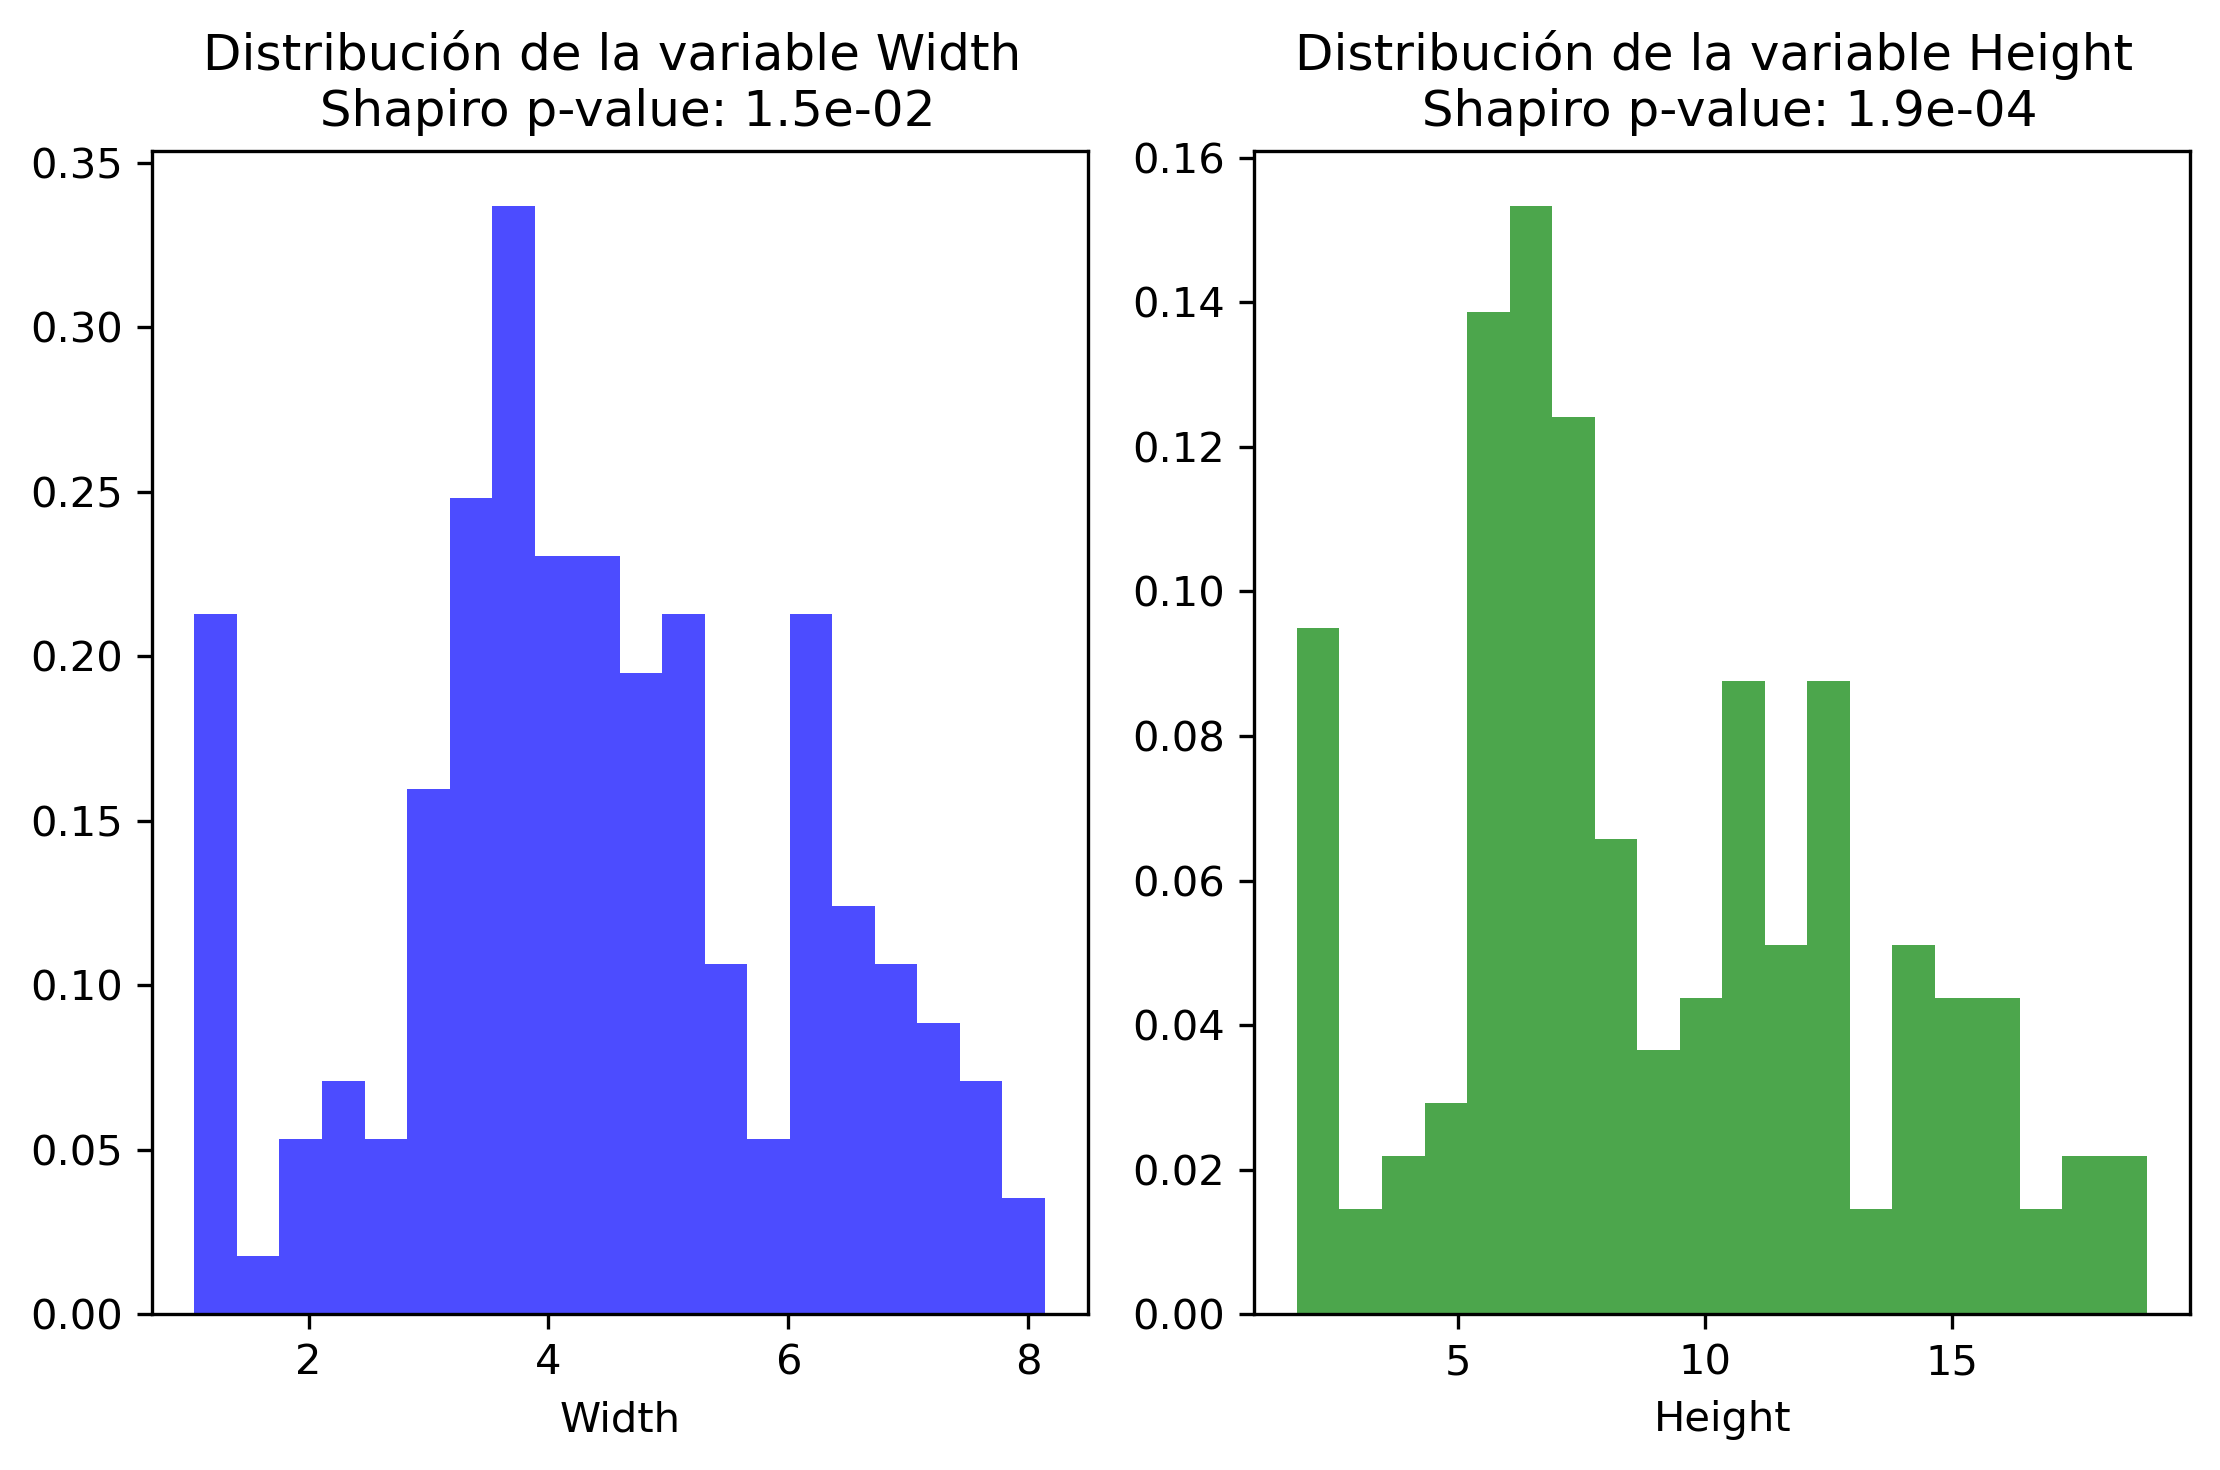

In [88]:
# Distribución de los datos
fig, ax = plt.subplots(1, 2, figsize=(7.5, 5), dpi = 300)
shapiro_p = stats.shapiro(width)[1]

ax[0].hist(width, bins=20, color='blue', alpha=0.7, density=True)
ax[0].set_title('Distribución de la variable Width \n Shapiro p-value: {:.1e}'.format(shapiro_p))
ax[0].set_xlabel('Width')

ax[1].hist(height, bins=20, color='green', alpha=0.7, density=True)
shapiro_p = stats.shapiro(height)[1]
ax[1].set_title('Distribución de la variable Height \n Shapiro p-value: {:.1e}'.format(shapiro_p))
ax[1].set_xlabel('Height')
fig.tight_layout()
plt.show()

Podemos ver que ambas distribuciones no son normales. Pero no es un problema debido a que los supuestos de normalidad una regresión lineal se aplican a los residuos :D

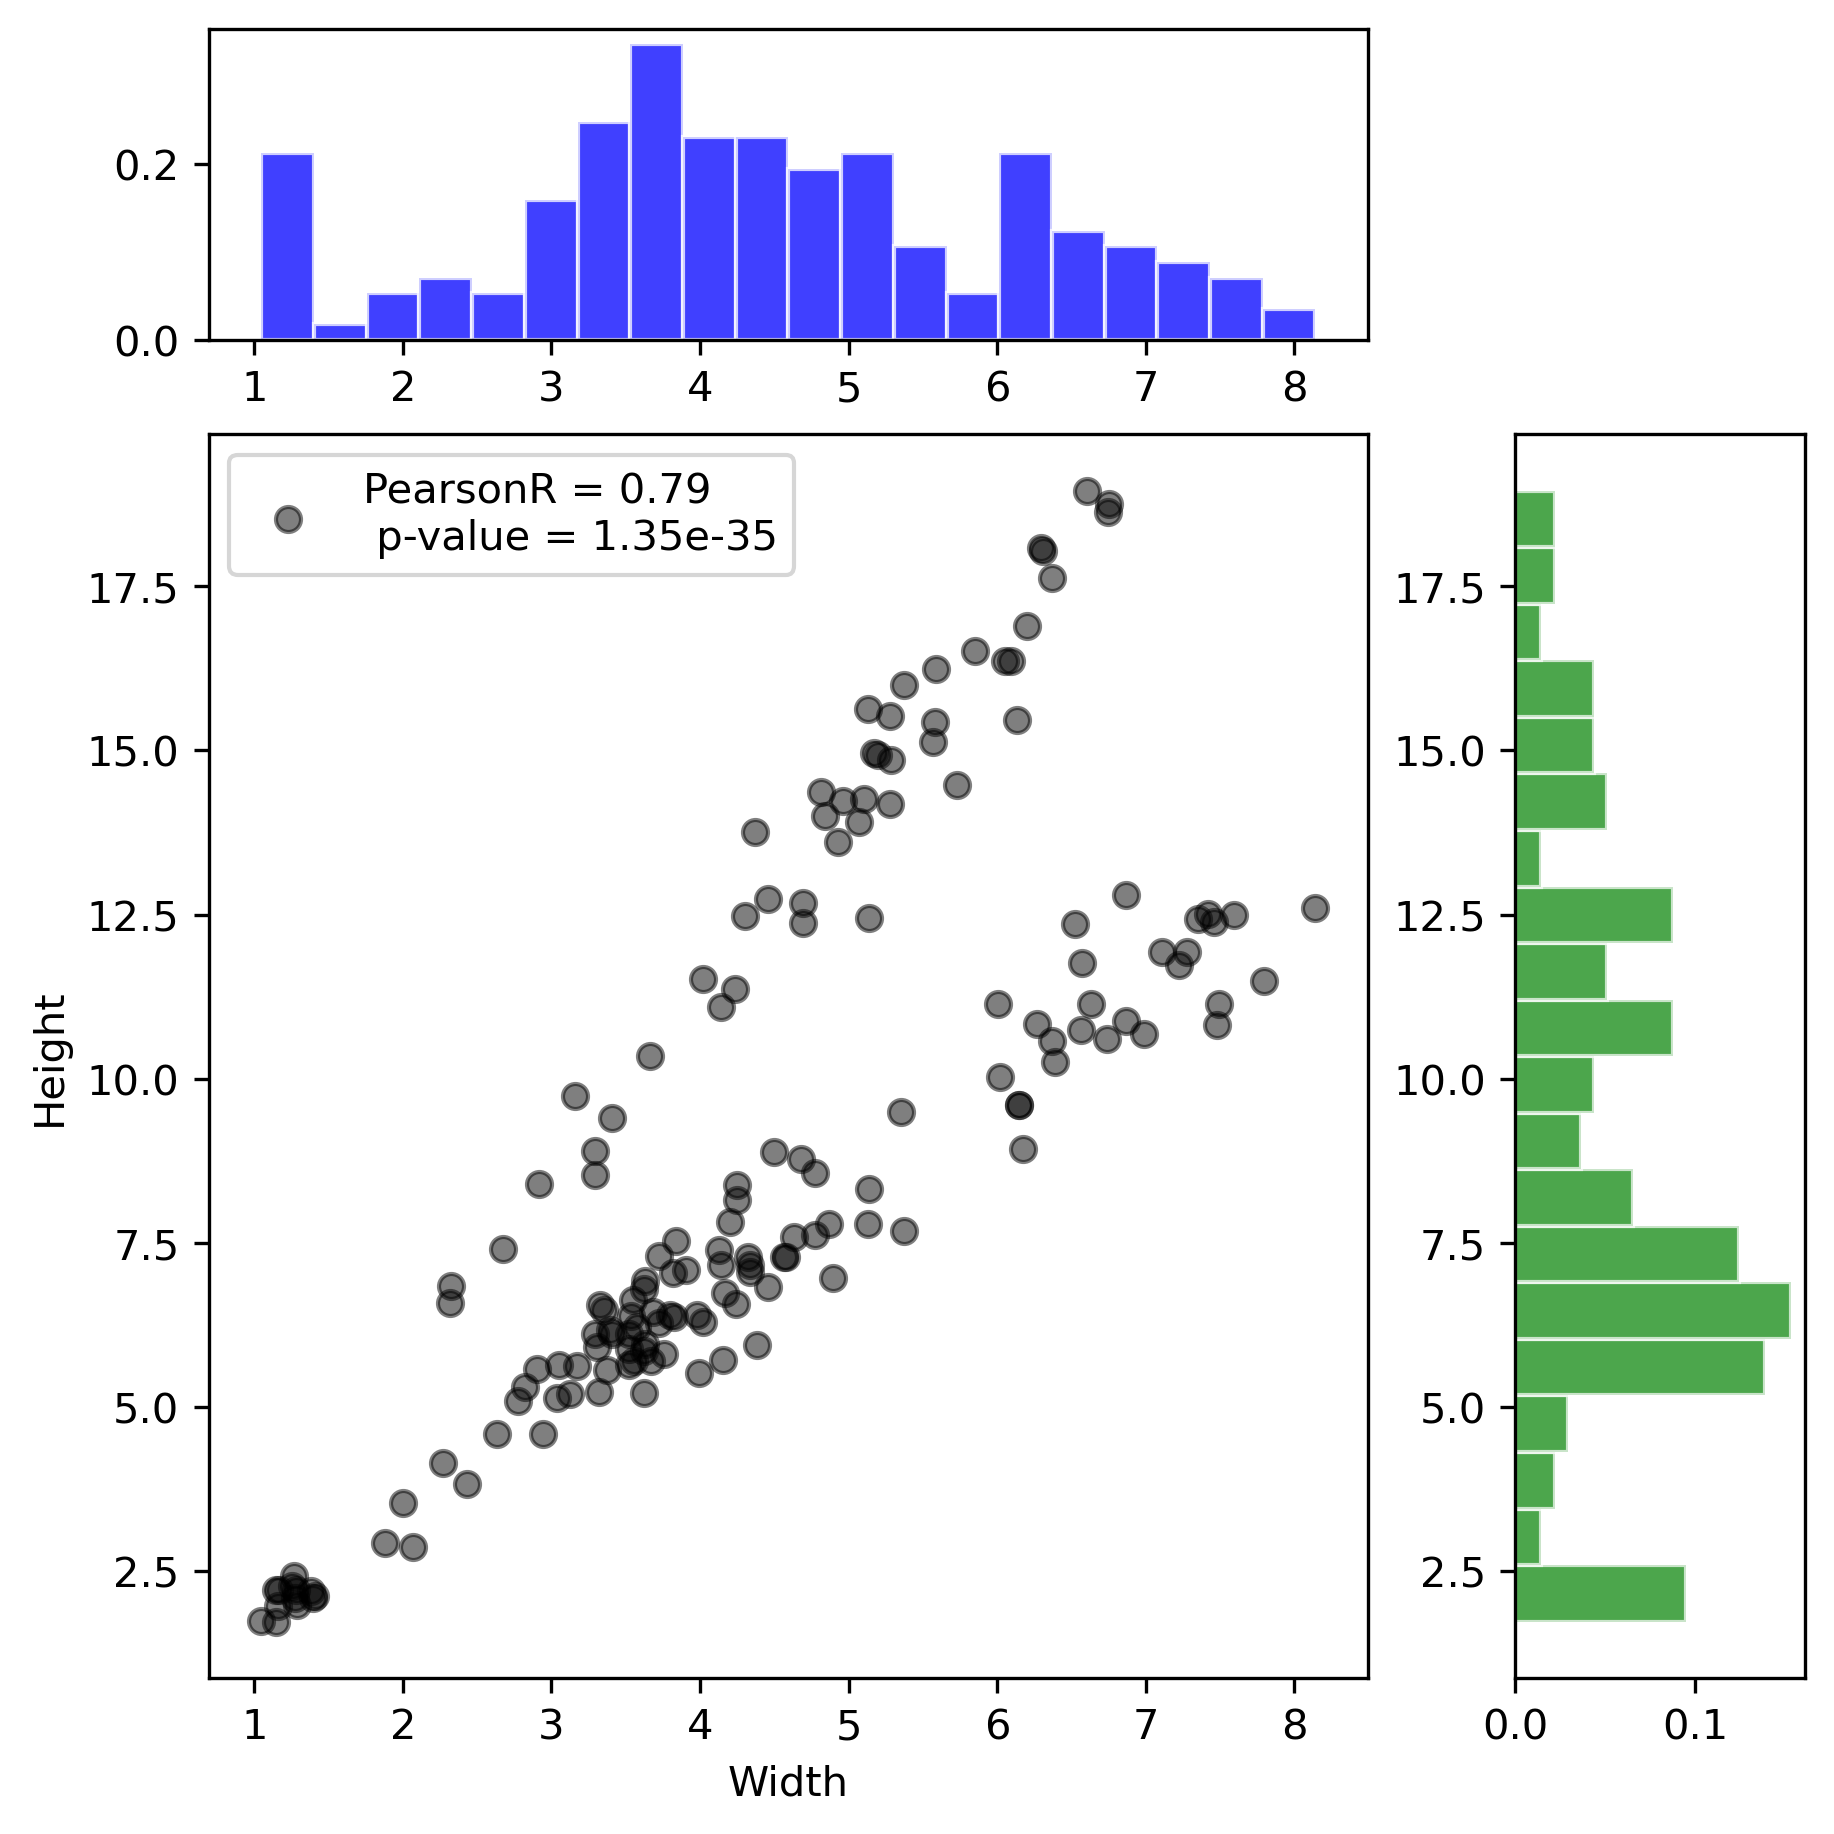

In [ ]:
# Ahora analizamos ambas variables juntas
fig, axs = plt.subplot_mosaic([['histx', '.'],
                               ['scatter', 'histy']],
                              figsize=(6, 6),
                              width_ratios=(4, 1), height_ratios=(1, 4),
                              layout='constrained', dpi = 300)

# pearsonr, pearson_pval = stats.pearsonr(width, height) # calculamos el coeficiente de correlación de Pearson
axs['scatter'].scatter(width, height, alpha=0.5, color = 'black')
axs['histx'].hist(width, bins=20, color='blue', alpha=0.75, density=True, edgecolor='white')
axs['histy'].hist(height, bins=20, color='green', alpha=0.7, density=True, orientation='horizontal', edgecolor='white')
axs['scatter'].set_xlabel('Width')
axs['scatter'].set_ylabel('Height')
axs['scatter'].legend(loc = 'upper left')

Podemos ver diferentes "zonas" en la linea de regresión. ¿Qué pasa si agregamos la especie del pez en estos casos?

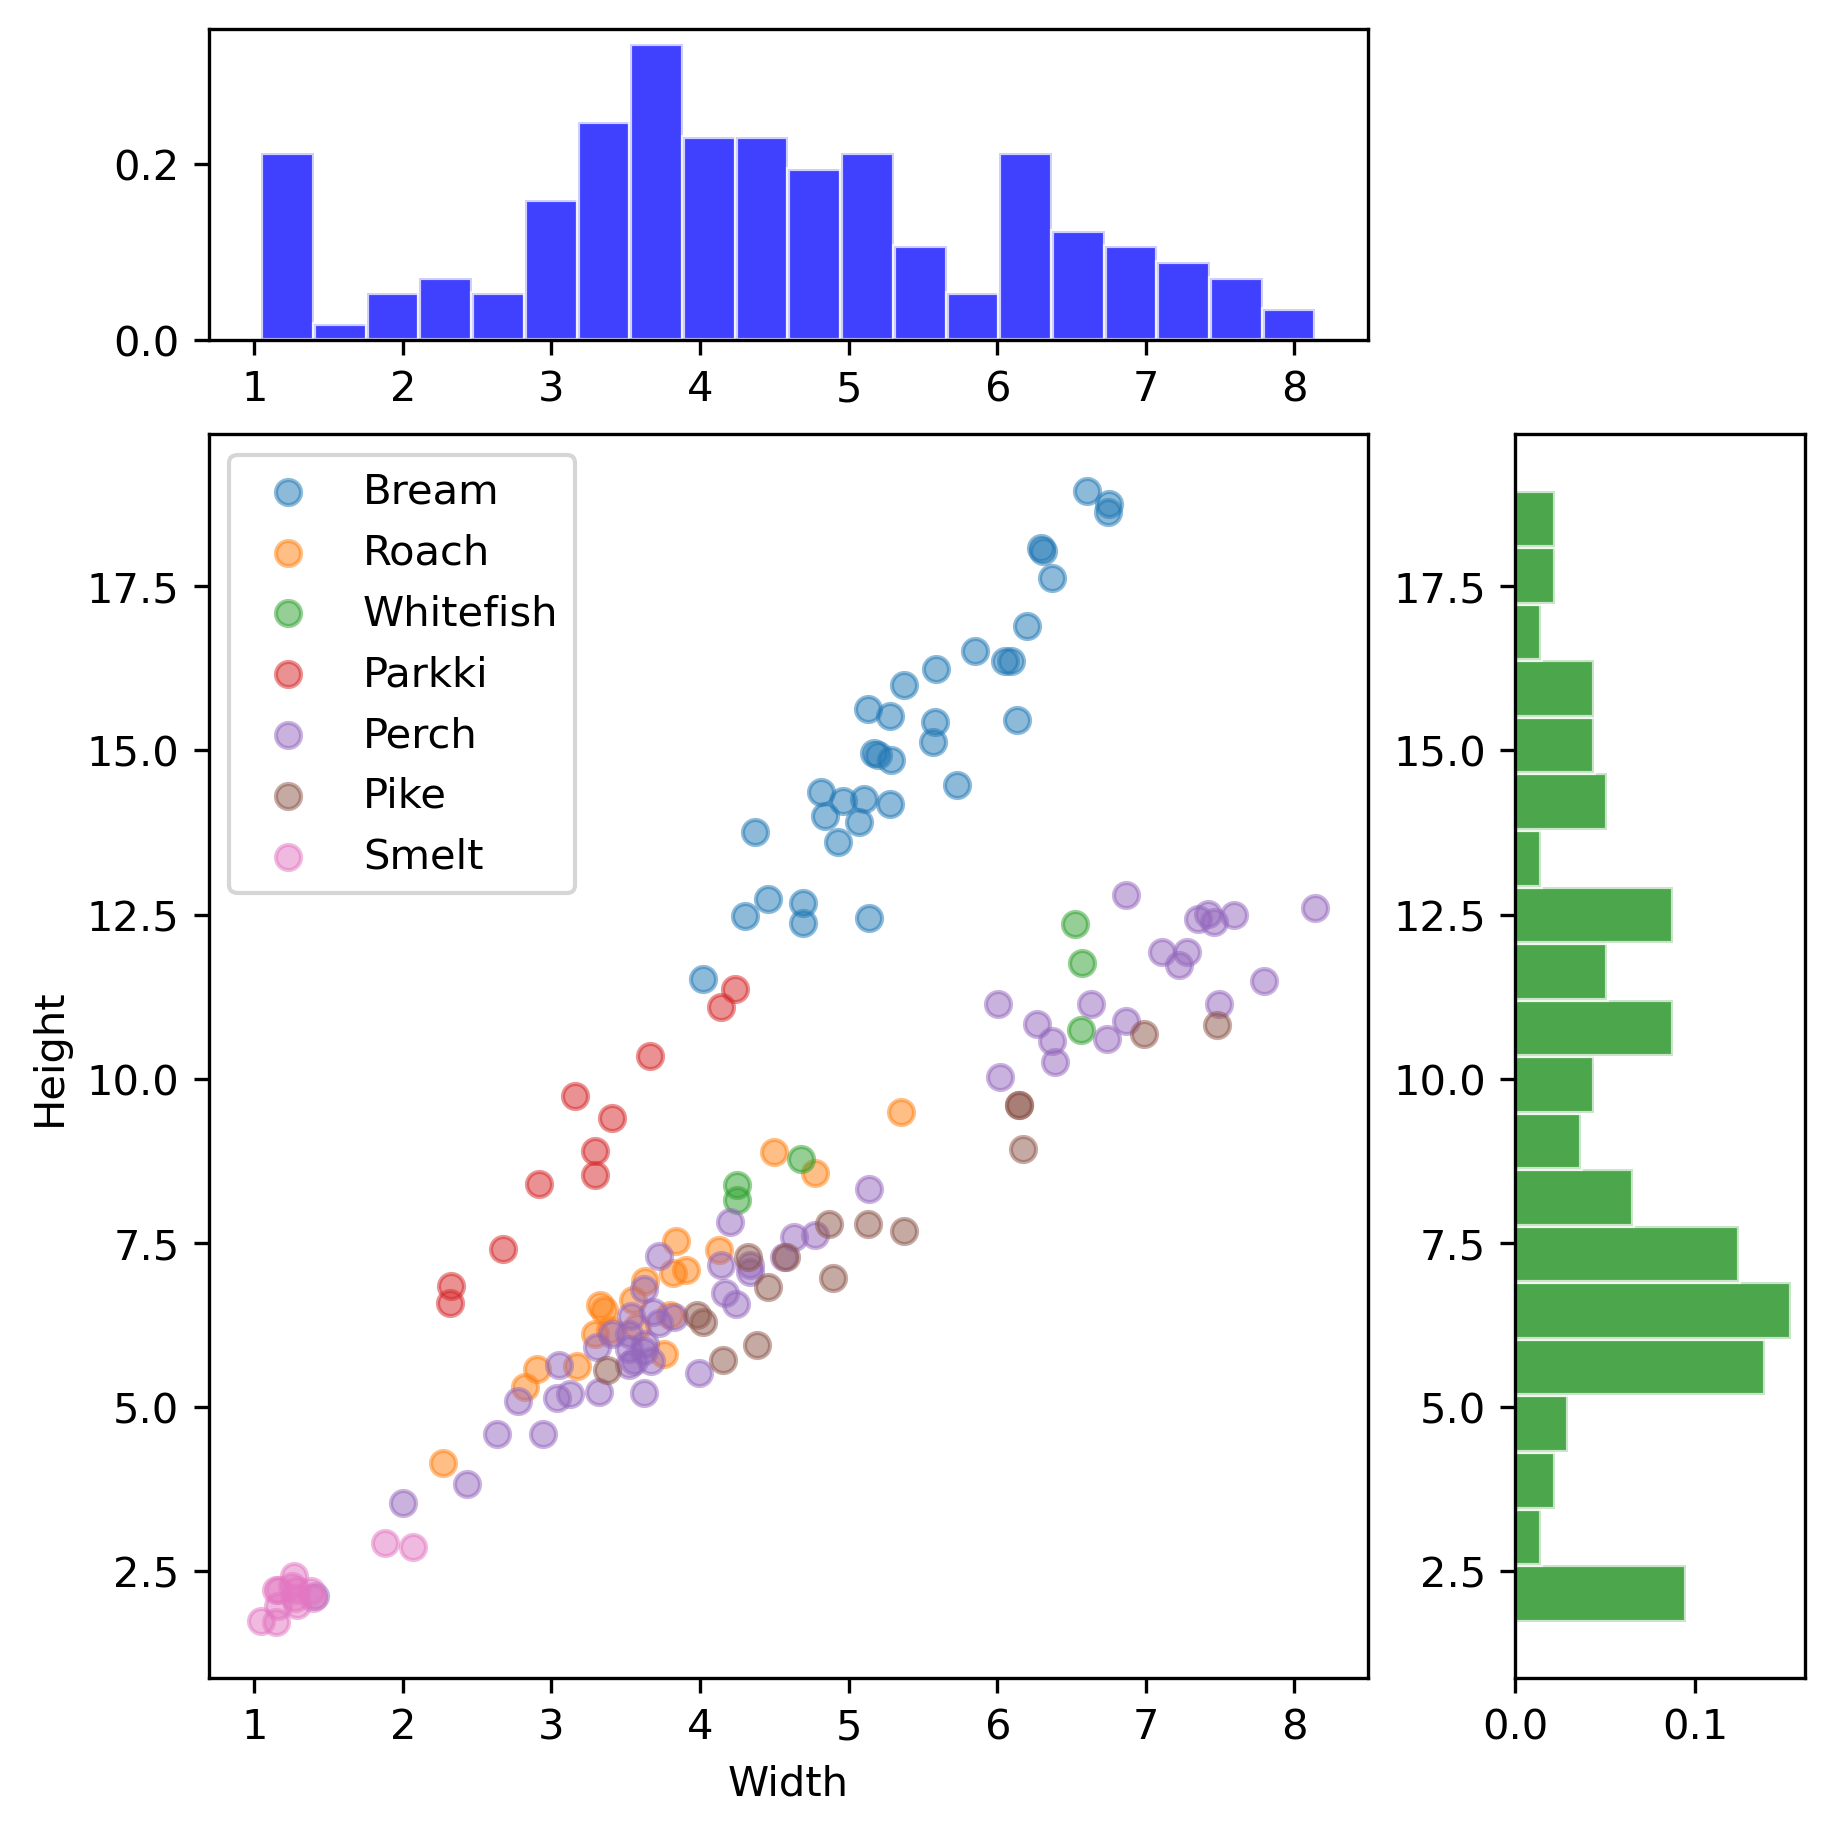

In [110]:
# Ahora analizamos ambas variables juntas
fig, axs = plt.subplot_mosaic([['histx', '.'],
                               ['scatter', 'histy']],
                              figsize=(6, 6),
                              width_ratios=(4, 1), height_ratios=(1, 4),
                              layout='constrained', dpi = 300)


specie = df['Species'] # extraemos la columna Species
for i in specie.unique():
    # slope, intercept, r_value, p_value, std_err = stats.linregress(width[specie == i], height[specie == i]) # forma rapida de calcular la regresión lineal
    # axs['scatter'].plot(width[specie == i], slope*width[specie == i] + intercept, linewidth=2)
    axs['scatter'].scatter(width[specie == i], height[specie == i], alpha=0.5, label = i)

axs['histx'].hist(width, bins=20, color='blue', alpha=0.75, density=True, edgecolor='white')
axs['histy'].hist(height, bins=20, color='green', alpha=0.7, density=True, orientation='horizontal', edgecolor='white')
axs['scatter'].set_xlabel('Width')
axs['scatter'].set_ylabel('Height')
axs['scatter'].legend(loc = 'upper left')

## Cálculo de Regresión lineal
>Estime los coeficientes de un modelo de regresión lineal simple que relacione `Height` como variable respuesta y `Width` como predictor. Grafique los datos junto con la recta ajustada. 
>>Agregue en la esquina superior derecha una etiqueta que indique el coeficiente de correlación de Pearson y su valor-$p$.

Recordando que la regresión lineal posee la forma 
$$
\mathbf{y} = \beta_0 + \beta_1 \mathbf{x}
$$
Donde $\mathbf{y}$ es el vector de datos respuesta y $\mathbf{x}$ es el vector con los datos explicativos. Ahora, podemos calcular los valores de $\beta_0$ y $\beta_1$ por medio de las siguientes ecuaciones:

$$
\widehat{\beta}_1 = \frac{S_{xy}}{S_{xx}}
$$
$$
\widehat{\beta}_0 = \overline{y} - \widehat{\beta}_1 \overline{x}
$$

Donde, x es `Width` e y es `Height`.

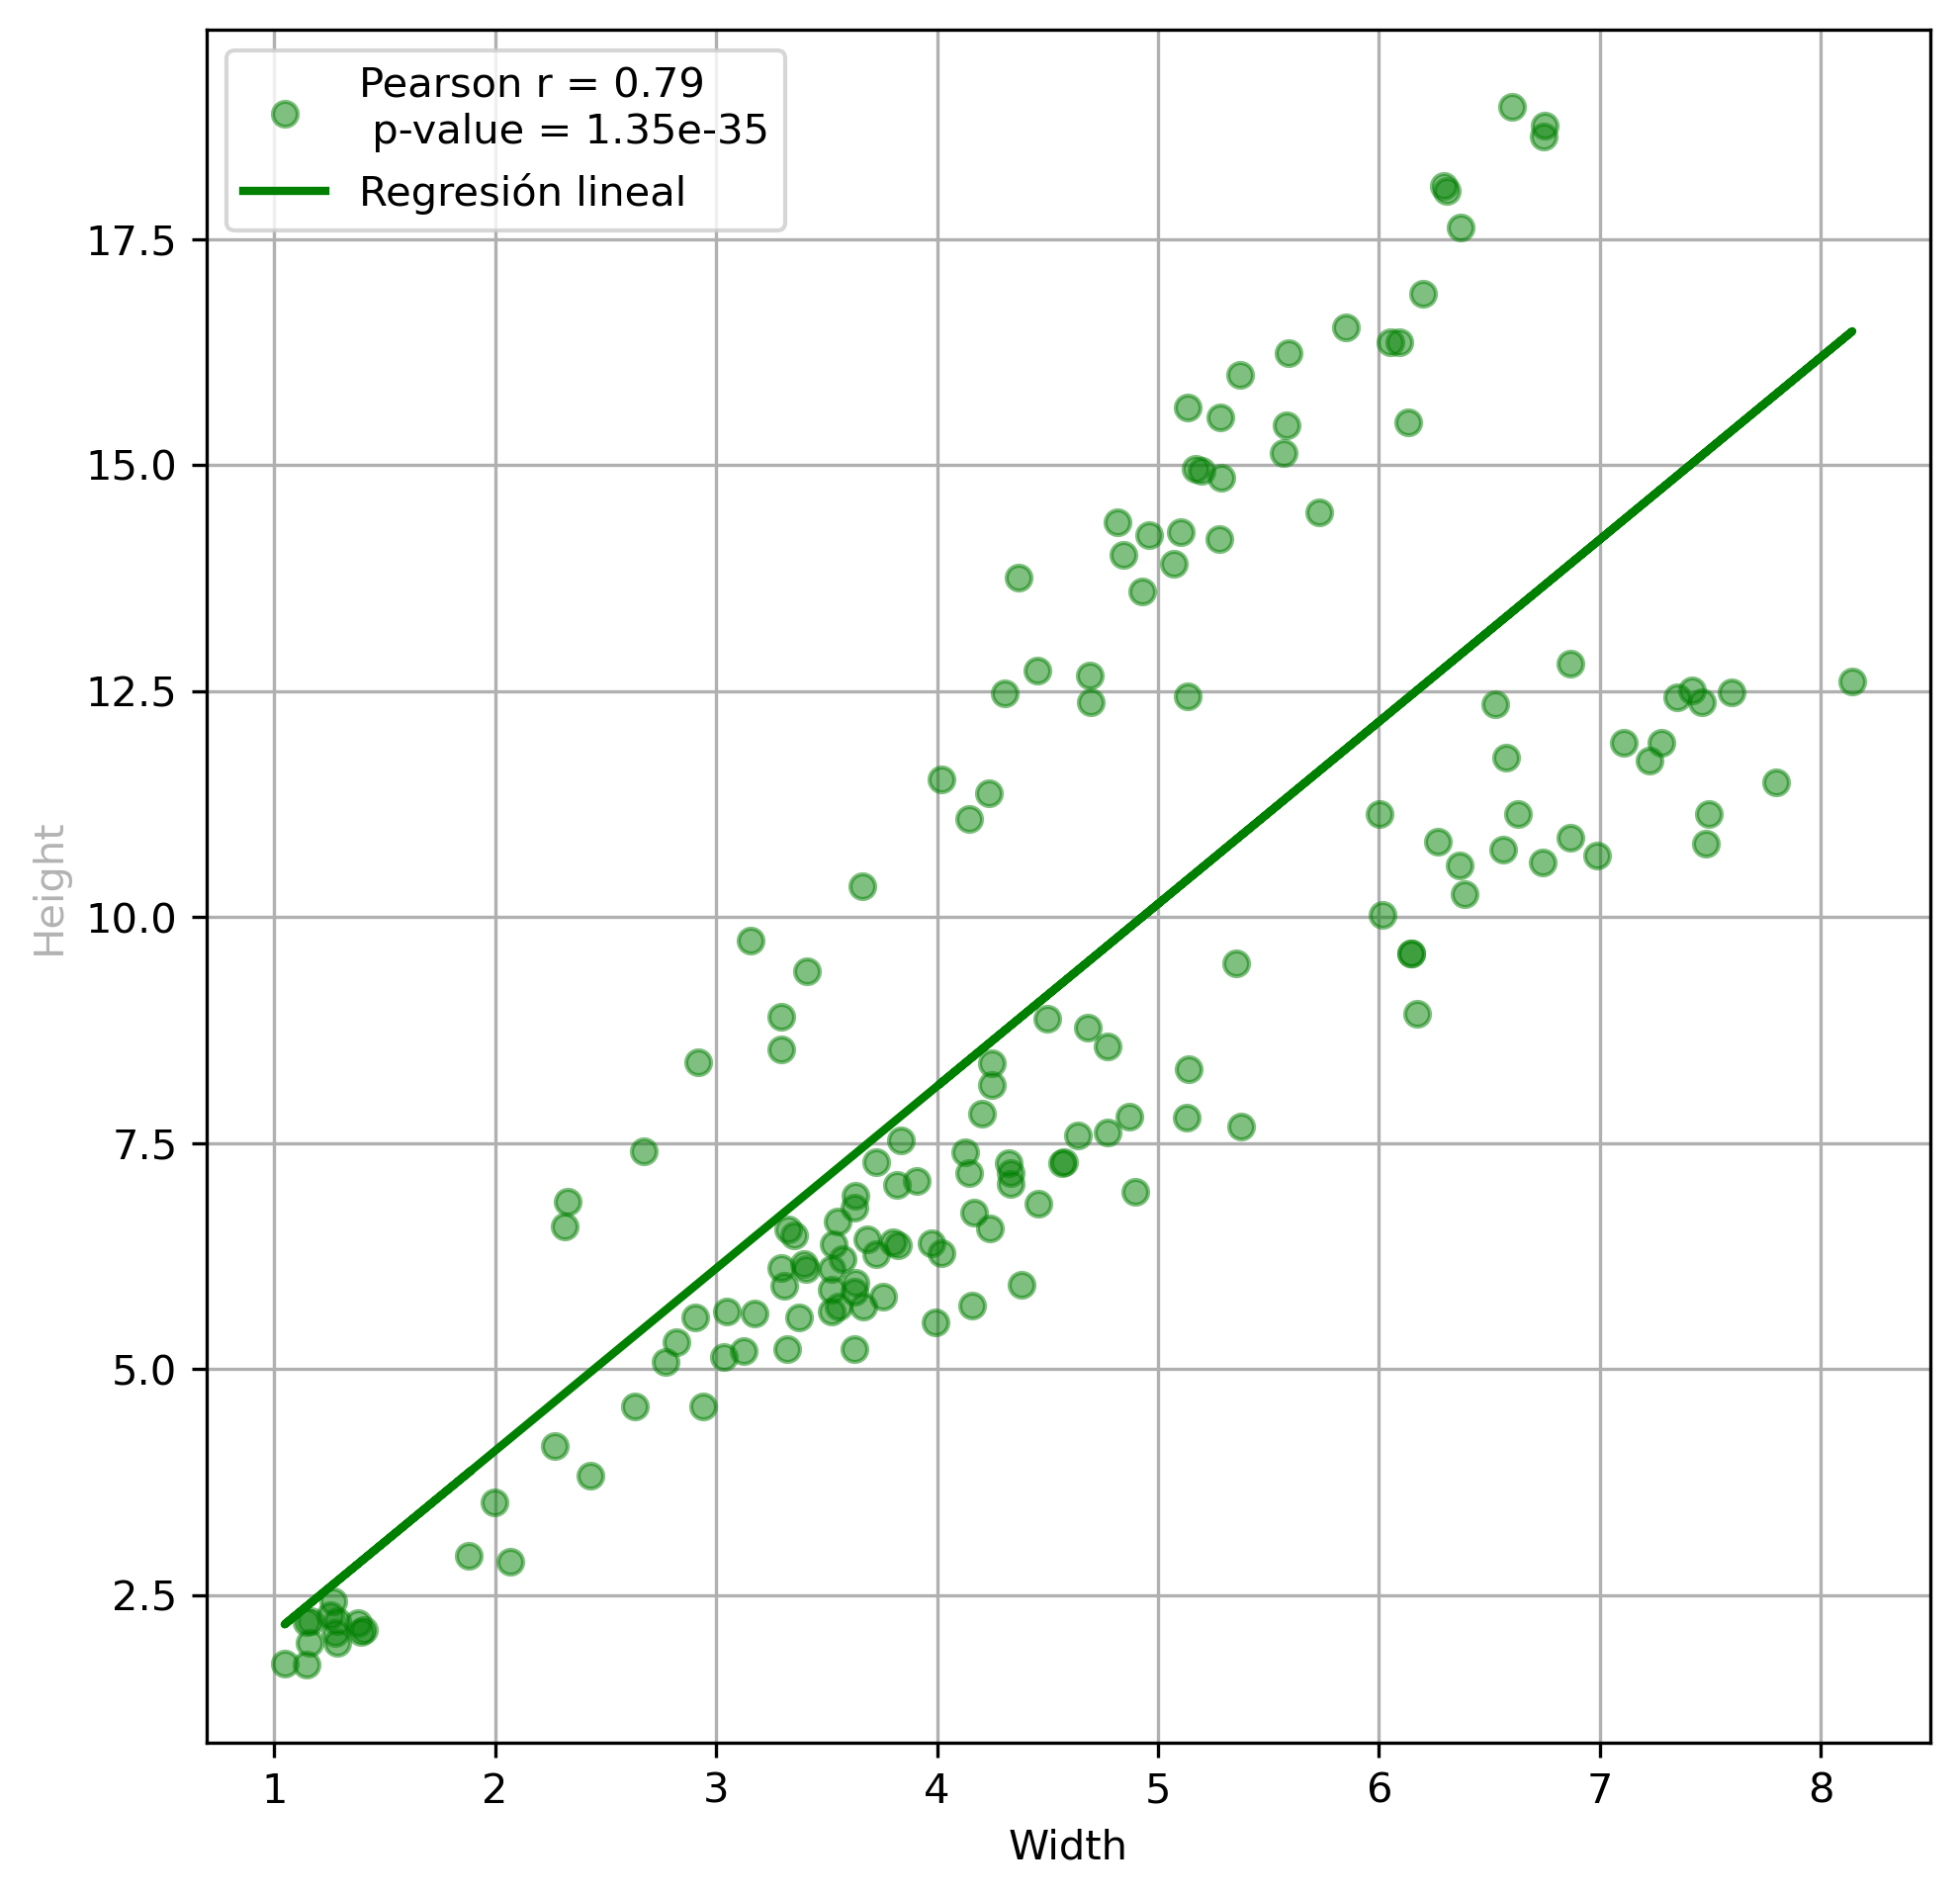

In [119]:
S_xx = np.sum((width - np.mean(width))**2) # suma de cuadrados de X 
S_xy = np.sum((width - np.mean(width))*(height - np.mean(height))) # suma de cuadrados cruzada

beta_1 = S_xy/S_xx # pendiente de la recta de regresión
beta_0 = np.mean(height) - beta_1*np.mean(width) # intersección de la recta de regresión

# ahora graficamos
fig, ax = plt.subplots(figsize=(7.5, 7.5), dpi = 300)
pearson_r, pearson_pval = stats.pearsonr(width, height) # calculamos el coeficiente de correlación de Pearson
ax.scatter(width, height, alpha=0.5, color = 'green',
           label = f'Pearson r = {pearson_r:.2f} \n p-value = {pearson_pval:.2e}',zorder = 3)
ax.plot(width, beta_1*width + beta_0, linewidth=2, color = 'green', label = 'Regresión lineal', zorder = 3)
ax.legend( loc = 'upper left')
ax.set_xlabel('Width')
ax.set_ylabel('Height', alpha = 0.3, zorder = 0)
ax.grid()
plt.show()

> Calcule el coeficiente de determinación ($R^2$) del modelo. ¿Qué proporción de la varianza de la anchura es explicada por la altura?

Recordemos que el coeficiente de determinacion probee una noción de la proporción de varianza que explica el modelo de regresión lineal. La formula por la cual uno es capaz de calcular dicho coeficiente es:
$$
R^2 = \frac{SS_R}{SS_T} = 1 - \frac{SS_E}{SS_T}
$$
